<h1 align=center> Computer Vision: Assignment 1 </h1>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Problem 1

Implement a function to increase the contrast of any gray-scale image according to the transformation given below and compute the contrast using the co-occurrence matrix measure given in lectures. The function should take as inputs the gray-scale image in addition to the parameters A, B, C and D. The function should output the transformed image. Apply your function to the “Ocean.bmp”
image. 

Deliverables:
    - Your code.
    - A .bmp file for the transformed image with 
        - (a) A=30, B=20, C=180 and D=230 and 
        - (b) A=70, B=20, C=140 and D=240.
    - Name the files “Ocean_a.bmp” and “Ocean_b.bmp”.
    - A text file containing the contrast value for both images. Name the file “contrast.txt”.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

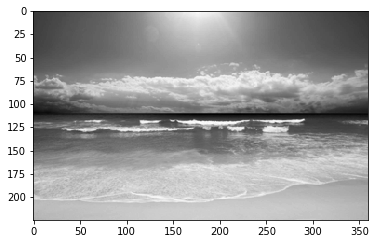

In [3]:
ocean_image = Image.open('Ocean.bmp')
plt.imshow(ocean_image, cmap="gray")

In [4]:
ocean_image, ocean_image.format, ocean_image.size, ocean_image.mode

(<PIL.BmpImagePlugin.BmpImageFile image mode=L size=360x225 at 0x116B336D8>,
 'BMP',
 (360, 225),
 'L')

In [5]:
ocean_image_np = np.array(ocean_image)
ocean_image_np, ocean_image_np.shape

(array([[ 80,  80,  81, ...,  75,  75,  75],
        [ 80,  80,  81, ...,  75,  75,  75],
        [ 80,  80,  81, ...,  76,  76,  76],
        ...,
        [181, 180, 179, ..., 180, 180, 180],
        [179, 177, 177, ..., 180, 180, 180],
        [177, 177, 178, ..., 181, 180, 179]], dtype=uint8), (225, 360))

In [6]:
def get_straight_line_eq(x1, y1, x2, y2):
    """
    The general equation of a straight line is y = mx + c
    where m is the gradient, and c is the intercept on the y-axis. 
    """
    m = ((y2 - y1) / (x2 - x1))
    c = y1 - (m * x1)
    return m, c

In [7]:
def change_contrast(img, a, b, c, d):
    """
    Method that change the contrast according to the a,b,c,d values
    """
    m1, c1 = get_straight_line_eq(0, 0, a, b)
    m2, c2 = get_straight_line_eq(a, b, c, d)
    m3, c3 = get_straight_line_eq(c, d, 255, 255)
    
    first_mask = ((img >= 0) & (img <= a))
    second_mask = ((img > a) & (img <= c))
    third_mask = ((img >= c) & (img <= 255))
    
    img = np.where(first_mask, (m1 * img) + c1, img)
    img = np.where(second_mask, (m2 * img) + c2, img)
    img = np.where(third_mask, (m3 * img) + c3, img)
    
    return img.astype(int)

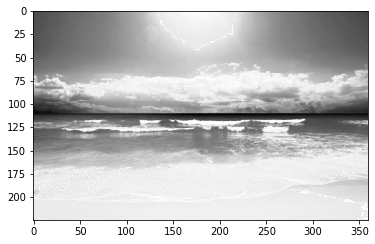

In [8]:
ocean_a_np = change_contrast(ocean_image_np, 30, 20, 180, 230)
ocean_a = Image.fromarray(ocean_a_np.astype('uint8'))
plt.imshow(ocean_a, cmap="gray")
ocean_a.save("Ocean_a.bmp")

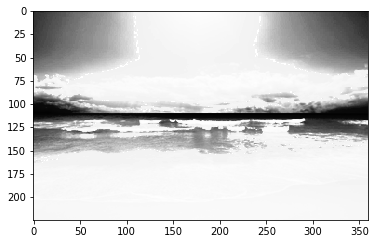

In [9]:
ocean_b_np = change_contrast(ocean_image_np, 70, 20, 140, 240)
ocean_b = Image.fromarray(ocean_b_np.astype('uint8'))
plt.imshow(ocean_b, cmap="gray")
ocean_b.save("Ocean_b.bmp")

In [10]:
def get_co_occurrence_matrix(img, relation="NS"):
    """
    Co-occurrence Matrix Algorithm:
    find matrix according to given relation 
        - "NS": North-South
        - "EW": East-West
    """
    
    img_np = np.array(img).transpose() if (relation == 'NS') else np.array(img)
    
    indices = np.unique(img_np)
    co_occurence_matrix = np.zeros((indices.shape[0], ) * 2)

    for row in range(0, img_np.shape[0]):
        for col in range(0, img_np.shape[1] - 1):

            first_value = img_np[row, col]
            second_value = img_np[row, col + 1]

            co_occurence_matrix[np.where(indices == first_value), np.where(indices == second_value)] += 1

    return indices, co_occurence_matrix

In [11]:
def get_contrast_from_co_occurence_matrix(img, relation='NS'):
    contrast = 0
    indices, co_occurence_matrix = get_co_occurrence_matrix(img, relation)

    for i in range(0, co_occurence_matrix.shape[0]):
        for j in range(0, co_occurence_matrix.shape[1]):
            contrast += co_occurence_matrix[i, j] * ((indices[i] - indices[j]) ** 2)
    return contrast

In [12]:
ocean_a_image_contrast = get_contrast_from_co_occurence_matrix(ocean_a)
f'Contrast Of (Ocean_a) Image: {ocean_a_image_contrast}'

/Users/amrmkayid/anaconda3/envs/kayai/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


'Contrast Of (Ocean_a) Image: 1974785404.0'

In [ ]:
ocean_b_image_contrast = get_contrast_from_co_occurence_matrix(ocean_b)
f'Contrast Of (Ocean_b) Image: {ocean_b_image_contrast}'

In [ ]:
contrast_file = open("contrast.txt", "w")
out = (f'Contrast Of (Ocean_a) Image: {ocean_a_image_contrast}\n' + 
       f'Contrast Of (Ocean_b) Image: {ocean_b_image_contrast}')
contrast_file.write(out)
out

# Problem 2

**a)** Implement the integral image algorithm that can obtain the integral image for any gray-scale image. Apply your function to the image “cameraman.tif”. Your function should take the image as an input and should output the integral image.
Deliverables:
    - Your code.
    - The integral image obtained for the “cameraman.tif” image. Name the file “Camera_Integ.jpg”

In [ ]:
np.cumsum?

In [ ]:
def integral_image_algorithm(img, normalized=True):    
    f = np.array(img)
    s = np.array(img).astype("uint32")
    
    for row in range(0, s.shape[0]):
        for col in range(1, s.shape[1]):
            s[row, col] = s[row, col - 1] + f[row, col]
            
    ii_img = np.array(s)
    for row in range(1, s.shape[0]):
        for col in range(0, s.shape[1]):
            ii_img[row, col] = ii_img[row - 1, col] + s[row, col]
            
    if normalized:
        ii_img = (ii_img - np.min(ii_img)) / (np.max(ii_img) - np.min(ii_img)) * 255
    
    return ii_img

In [ ]:
def ii_img_using_numpy(img, normalized=True):    
    S = np.array(img)
    for i in range(S.ndim):
        S = S.cumsum(axis=i)
    if normalized:
        ii_img = (ii_img - np.min(ii_img)) / (np.max(ii_img) - np.min(ii_img)) * 255
    return S

In [ ]:
cameraman_img = Image.open("Cameraman_noise.bmp")
ii_img = integral_image_algorithm(cameraman_img)
plt.imshow(ii_img, cmap="gray"); ii_img

In [ ]:
ii_img_using_np = integral_image_algorithm(cameraman_img)
plt.imshow(ii_img_using_np, cmap="gray"); ii_img_using_np

In [ ]:
ii_image = Image.fromarray(ii_img.astype('uint8'))
ii_image.save("Camera_Integ.jpg")

**b)** Implement an average filter for noise removal that uses the function you wrote in (a). Apply your function to the image “cameraman.tif”. Your function should take the image as an input in addition to the size of the filter (s x s). The function should output the filtered image.
Deliverables:
    - Your code.
    - The filtered image obtained for a filter size of 3 x 3. Name the file “Camera_Filt_3.jpg”
    - The filtered image obtained for a filter size of 5 x 5. Name the file “Camera_Filt_5.jpg”


In [ ]:
np.pad?

In [ ]:
def avg_filter(img, kernal_size=3):
    ii_img = integral_image_algorithm(img, normalized=False)
    
    offset = kernal_size // 2
    pad = kernal_size // 2 + 1
    padded_ii_img = np.pad(ii_img, pad_width=pad)
    output_img = np.zeros(ii_img.shape)
    
    for row in range(ii_img.shape[0] - offset):
        for col in range(ii_img.shape[1] - offset):
            bottom_right = padded_ii_img[row + offset][col + offset] 
            top_left = padded_ii_img[row - offset - 1][col - offset - 1]
            top_right = padded_ii_img[row - offset - 1][col + offset]
            bottom_left = padded_ii_img[row + offset][col - offset - 1]
#             print(bottom_right, top_left, top_right, bottom_left)
            output_img[row][col] = ((bottom_right + top_left) - ( top_right + bottom_left)) // (kernal_size**2)
    
    return output_img

In [ ]:
cameraman_img = Image.open("Cameraman_noise.bmp")
plt.imshow(cameraman_img, cmap="gray")

In [ ]:
avg_filtered_img_3_by_3 = avg_filter(cameraman_img, kernal_size=3)
plt.imshow(avg_filtered_img_3_by_3, cmap="gray")
Camera_Filt_3 = Image.fromarray(avg_filtered_img_3_by_3.astype('uint8'))
Camera_Filt_3.save("Camera_Filt_3.jpg")

In [ ]:
avg_filtered_img_5_by_5 = avg_filter(cameraman_img, kernal_size=5)
plt.imshow(avg_filtered_img_5_by_5, cmap="gray")
Camera_Filt_5 = Image.fromarray(avg_filtered_img_5_by_5.astype('uint8'))
Camera_Filt_5.save("Camera_Filt_5.jpg")

**c)** What is the advantage of using the integral image for average filtering compared to traditional convolution implementation of average filtering?
> Less Computation for different filter sizes